In [2]:
from matplotlib import pyplot as plt
from aeon.forecasting.compose import make_reduction
from aeon.datasets import load_airline
from sklearn.ensemble import GradientBoostingRegressor
from aeon.utils.plotting import plot_series
import numpy as np
import pandas as pd
from aeon.forecasting.model_selection import temporal_train_test_split

In [3]:
y = load_airline()

In [4]:
random_data = np.random.random((y.shape[0], 3))
cols = [f'X{i+1}' for i in range(random_data.shape[1])]
X = pd.DataFrame(data=random_data, columns=cols, index=y.index)
X.head()

,X1,X2,X3
Period,,,
1949-01,0.329981,0.955727,0.474545
1949-02,0.579243,0.447534,0.481697
1949-03,0.810714,0.388502,0.358374
1949-04,0.694700,0.631100,0.673081
1949-05,0.638335,0.150172,0.102921


In [5]:
y_train, y_test = temporal_train_test_split(y, test_size=36)
X_train, X_test = temporal_train_test_split(X, test_size=36)

In [6]:
fh = np.arange(len(y_test)) + 1

In [7]:
regressor = GradientBoostingRegressor(max_depth=None)


In [9]:
forecaster = make_reduction(regressor, window_length=20, strategy='recursive')

In [10]:
forecaster.fit(y_train, X=X_train)

RecursiveTabularRegressionForecaster(estimator=GradientBoostingRegressor(max_depth=None),
                                     window_length=20)

In [11]:
y_pred = forecaster.predict(fh, X=X_test)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

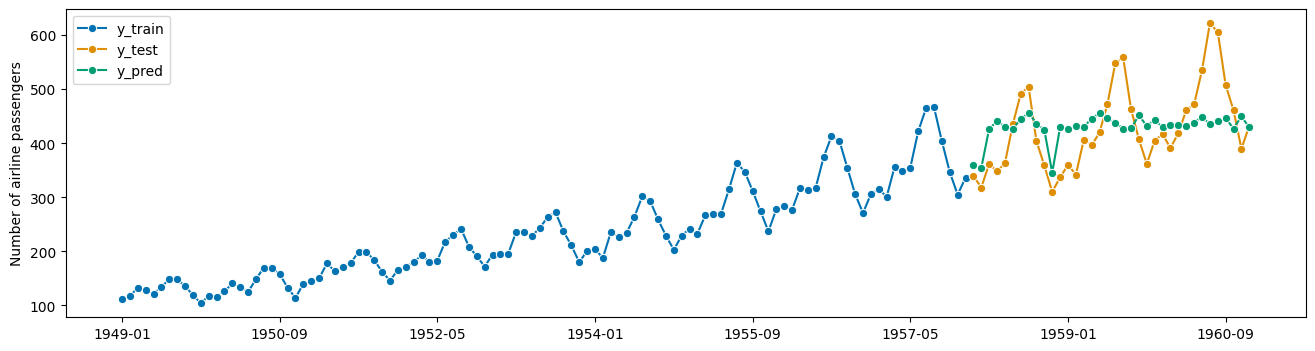

In [12]:
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])